In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")

In [44]:
input_dataset = "..\\data\\clean_data\\episodes.csv"
df = pd.read_csv(input_dataset)

print(f"Dataset Shape: {df.shape}")
print("\nFirst 5 rows:")
display(df.head())


Dataset Shape: (2205, 7)

First 5 rows:


,season,title,episode_number,episode_name,date,length,url
0,1,DRŽAVNI POSAO [HQ] - Ep.1: Rakija (24.09.2012.),1,Rakija,24.09.2012.,5:50,https://www.youtube.com/watch?v=McwPB-eQ2BY&li...
1,1,DRŽAVNI POSAO [HQ] - Ep.2: Pilići (25.09.2012.),2,Pilići,25.09.2012.,5:35,https://www.youtube.com/watch?v=hI2t9a4ED04&li...
2,1,DRŽAVNI POSAO [HQ] - Ep.3: Biti slobodan (26.0...,3,Biti slobodan,26.09.2012.,4:35,https://www.youtube.com/watch?v=0YlkzhkLXPg&li...
3,1,DRŽAVNI POSAO [HQ] - Ep.4: Čarape (27.09.2012.),4,Čarape,27.09.2012.,6:12,https://www.youtube.com/watch?v=EtaeiuYMpxg&li...
4,1,DRŽAVNI POSAO [HQ] - Ep.5: Korupcija (28.09.20...,5,Korupcija,28.09.2012.,7:22,https://www.youtube.com/watch?v=hNLaGPQY7k0&li...


In [45]:
def convert_length_to_seconds(length):
    if pd.isna(length):
        return np.nan
    
    try:
        parts = str(length).split(':')
        if len(parts) == 2:
            return int(parts[0]) * 60 + int(parts[1])
        elif len(parts) == 3:
            return int(parts[0]) * 3600 + int(parts[1]) * 60 + int(parts[2])
        else:
            return np.nan
    except:
        return np.nan

df['length_seconds'] = df['length'].apply(convert_length_to_seconds)

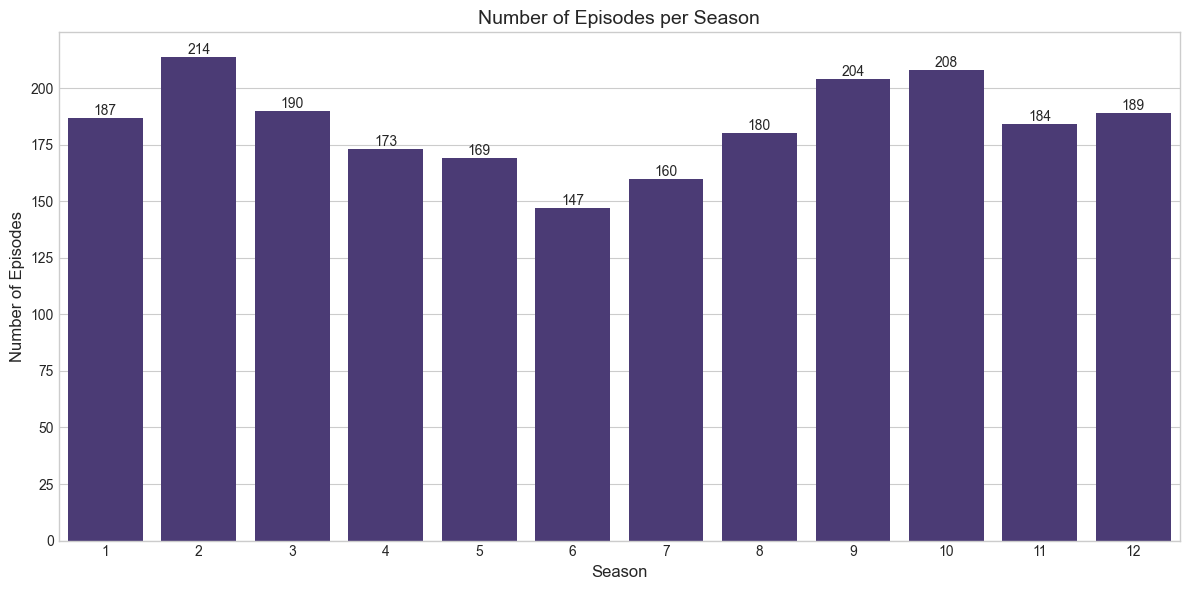

In [46]:
season_counts = df['season'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=season_counts.index, y=season_counts.values)
ax.bar_label(ax.containers[0])
plt.title('Number of Episodes per Season', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Number of Episodes', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

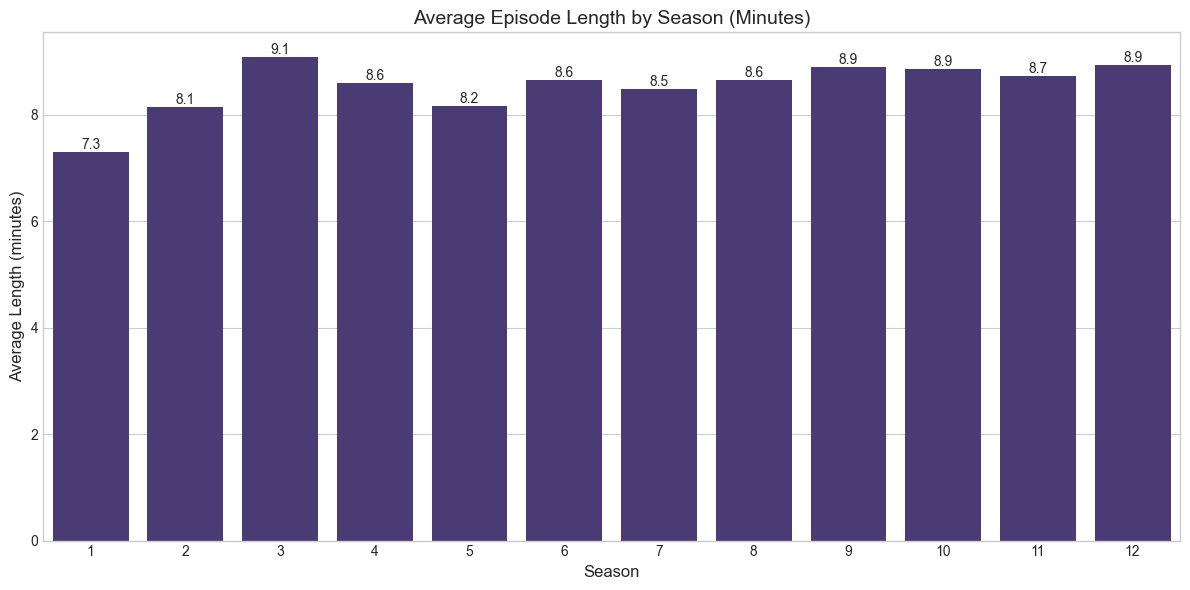

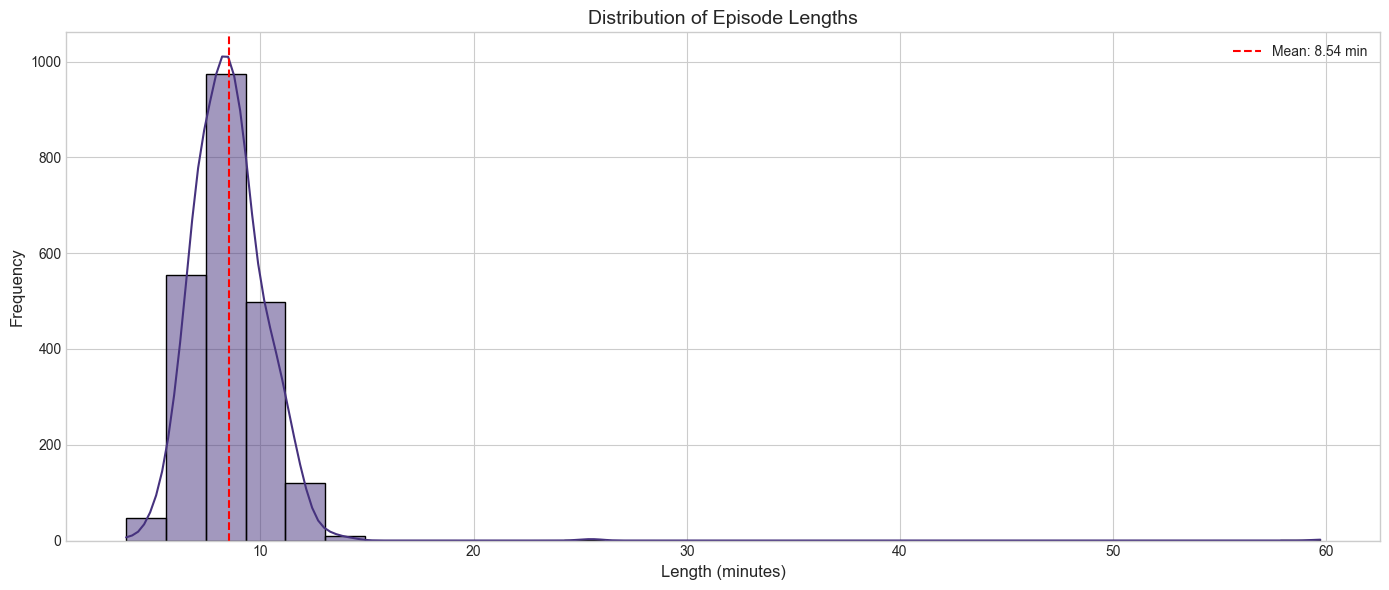

In [ ]:

plt.figure(figsize=(12, 6))
season_length = df.groupby('season')['length_seconds'].mean() / 60
ax = sns.barplot(x=season_length.index, y=season_length.values)
ax.bar_label(ax.containers[0], fmt='%.1f')
plt.title('Average Episode Length by Season (Minutes)', fontsize=14)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Average Length (minutes)', fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
sns.histplot(df['length_seconds']/60, bins=30, kde=True)
plt.title('Distribution of Episode Lengths', fontsize=14)
plt.xlabel('Length (minutes)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.axvline(df['length_seconds'].mean()/60, color='red', linestyle='--', label=f'Mean: {df["length_seconds"].mean()/60:.2f} min')
plt.legend()
plt.tight_layout()
plt.show()


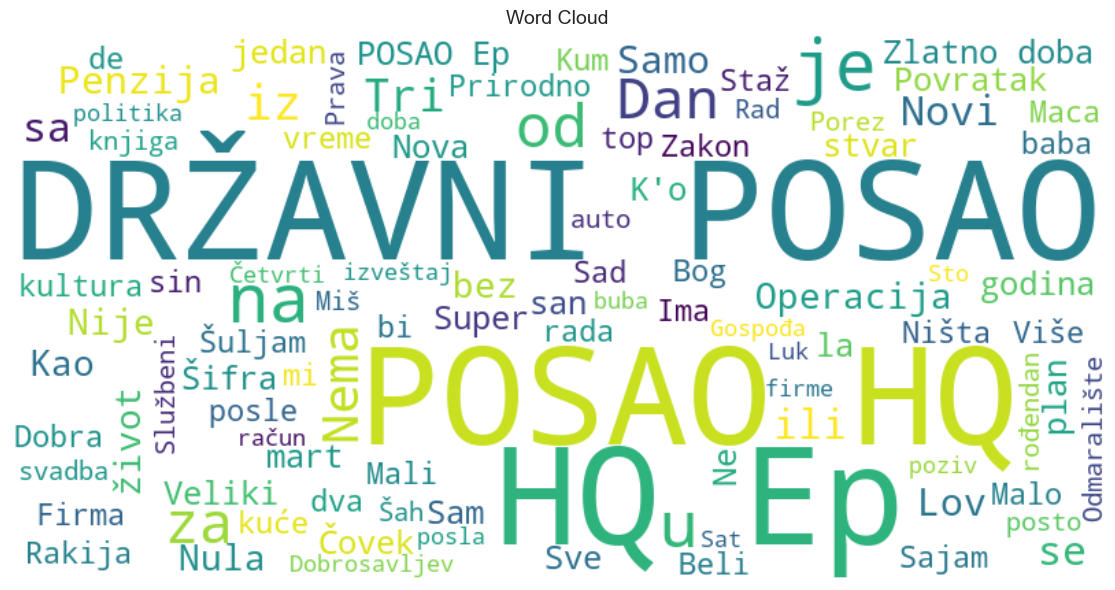

In [48]:
try:
    from wordcloud import WordCloud
    
    all_titles = ' '.join(df['title'].dropna().astype(str))
    
    wordcloud = WordCloud(
        width=800, 
        height=400, 
        background_color='white', 
        max_words=100, 
        contour_width=3, 
        contour_color='steelblue'
        ).generate(all_titles)
    
    plt.figure(figsize=(14, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title('Word Cloud', fontsize=14)
    plt.tight_layout()
    plt.show()
except ImportError:
    print("error")



In [51]:
df_sorted_by_length = df.sort_values('length_seconds')
df_sorted_by_length = df_sorted_by_length.dropna(subset=['length_seconds'])

shortest_episodes = df_sorted_by_length.head(5)
longest_episodes = df_sorted_by_length.tail(5)

print("5 Shortest Episodes:")
display(shortest_episodes[['season', 'episode_number', 'episode_name', 'length', 'length_seconds']])

print("\n5 Longest Episodes:")
display(longest_episodes[['season', 'episode_number','episode_name', 'length', 'length_seconds']])

5 Shortest Episodes:


,season,episode_number,episode_name,length,length_seconds
83,1,84,Sansultan,3:42,222
173,1,174,Prozor,3:45,225
21,1,22,Košarka,4:00,240
327,2,328,Predizborna tišina,4:18,258
2,1,3,Biti slobodan,4:35,275



5 Longest Episodes:


,season,episode_number,episode_name,length,length_seconds
418,3,419,Ugovor,14:03,843
495,3,496,Izveštaj,14:26,866
2015,11,2000,Dosije Gajdobra,25:14,1514
499,3,500,500,25:46,1546
282,2,283,Sindikalni doček 2014.,59:43,3583


In [50]:

print(f"Total number of episodes: {len(df)}")
print(f"Number of seasons: {df['season'].nunique()}")
print(f"Average episode length: {df['length_seconds'].mean()/60:.2f} minutes")
print(f"Shortest episode: {df['length_seconds'].min()/60:.2f} minutes")
print(f"Longest episode: {df['length_seconds'].max()/60:.2f} minutes")


Total number of episodes: 2205
Number of seasons: 12
Average episode length: 8.54 minutes
Shortest episode: 3.70 minutes
Longest episode: 59.72 minutes
